In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchinfo

In [3]:
# Checking if a GPU is available for training a model
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16440945243494027351
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4332792133086251039
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
# Display detailed information about the system's memory
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         6155056 kB
MemAvailable:   11483448 kB
Buffers:          402208 kB
Cached:          5078640 kB
SwapCached:            0 kB
Active:           846244 kB
Inactive:        5766364 kB
Active(anon):       1444 kB
Inactive(anon):  1142524 kB
Active(file):     844800 kB
Inactive(file):  4623840 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1408 kB
Writeback:             4 kB
AnonPages:       1131924 kB
Mapped:           835272 kB
Shmem:             12064 kB
KReclaimable:     185156 kB
Slab:             246372 kB
SReclaimable:     185156 kB
SUnreclaim:        61216 kB
KernelStack:        7860 kB
PageTables:        17636 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    4194688 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       84780 kB
VmallocChunk:    

In [5]:
# Display detailed information about the system's central processing unit (CPU)
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.168
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [6]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"panfucheng","key":"457350b53fd58602605ddf805852abad"}')
    # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73248 sha256=d3891457255fb2aa5fb1d6cab2d009e80b53c95b995eb05c66accea5e9b46b20
  Stored in directory: /root/.cache/pip/wheels/0b/76/ca/e58f8afa83166a0e68f0d5cd2e7f99d260bdc40e35da080eee
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [7]:
!kaggle datasets download behrad3d/nasa-cmaps
! mkdir train
! unzip nasa-cmaps.zip -d train

 89% 11.0M/12.3M [00:00<00:00, 26.9MB/s]
100% 12.3M/12.3M [00:00<00:00, 30.6MB/s]
Archive:  nasa-cmaps.zip
  inflating: train/CMaps/Damage Propagation Modeling.pdf  
  inflating: train/CMaps/RUL_FD001.txt  
  inflating: train/CMaps/RUL_FD002.txt  
  inflating: train/CMaps/RUL_FD003.txt  
  inflating: train/CMaps/RUL_FD004.txt  
  inflating: train/CMaps/readme.txt  
  inflating: train/CMaps/test_FD001.txt  
  inflating: train/CMaps/test_FD002.txt  
  inflating: train/CMaps/test_FD003.txt  
  inflating: train/CMaps/test_FD004.txt  
  inflating: train/CMaps/train_FD001.txt  
  inflating: train/CMaps/train_FD002.txt  
  inflating: train/CMaps/train_FD003.txt  
  inflating: train/CMaps/train_FD004.txt  
  inflating: train/CMaps/x.txt       


In [8]:
PM_train = '/content/train/CMaps/train_FD001.txt'
PM_test = '/content/train/CMaps/test_FD001.txt'
PM_truth = '/content/train/CMaps/RUL_FD001.txt'

# Binary classification
Predict if an asset will fail within certain time frame (e.g. cycles)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, GRU
from torchinfo import summary
import keras
import seaborn as sns

## Data Ingestion

In [10]:
# Read training data - Aircraft engine run-to-failure data
train_df = pd.read_csv(PM_train, sep=" ", header=None) # Read the txt file, use appropriate separator and header
train_df.drop([26, 27], axis=1, inplace=True)  # Explore the data on your own and remove unnecessary columns
train_df.columns = ["id", "cycle"] + [f"settings{i}" for i in range(1, 4)] + [f"sensor{i}" for i in range(1, 22)]  # Assign names to all the columns

train_df = train_df.sort_values(["id", "cycle"])  # Sort by id and cycle

# Read test data - Aircraft engine operating data without failure events recorded
test_df = pd.read_csv(PM_test, sep=" ", header=None)  # Read the txt file, use appropriate separator and header
test_df.drop([26, 27], axis=1, inplace=True)  # Explore the data on your own and remove unnecessary columns
test_df.columns = ["id", "cycle"] + [f"settings{i}" for i in range(1, 4)] + [f"sensor{i}" for i in range(1, 22)]  # Assign names to all the columns

# Read ground truth data - True remaining cycles for each engine in testing data
truth_df = pd.read_csv(PM_truth, sep=" ", header=None) # Read the txt file, use appropriate separator and header
truth_df.drop([1], axis=1, inplace=True)  # Explore the data on your own and remove unnecessary columns


In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
settings1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
settings2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
settings3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [12]:
columns2drop = ["settings1", "settings2", "settings3", "sensor1", "sensor10", "sensor18", "sensor19", "sensor5", "sensor6", "sensor16"]
train_df.drop(columns2drop, axis=1, inplace=True)

In [13]:
train_df

,id,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [14]:
test_df.drop(columns2drop, axis=1, inplace=True)

In [15]:
test_df

,id,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,100,195,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,100,196,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,100,197,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [16]:
truth_df

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


## Data Preprocessing

In [17]:
#######
# TRAIN
#######
# Data Labeling - generate column RUL (Remaining Useful Life or Time to Failure)

# TODO: Calculate the maximum cycle value for each engine (id) and store it in a new DataFrame (rul)
rul = train_df.groupby(["id"]).max().reset_index()
rul = rul[["id", "cycle"]]
# TODO: Rename the columns in the rul DataFrame
rul.columns = ["id", "max_cycle"]
# TODO: Merge the rul DataFrame with the original train_df based on the 'id' column
train_df = pd.merge(train_df, rul, on="id", how="left")
# TODO: Calculate the Remaining Useful Life (RUL) by subtracting the current cycle from the maximum cycle
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']
# TODO: Remove the temporary column used to calculate RUL
train_df.drop(['max_cycle'], axis=1, inplace=True)

# Generate label columns for training data
# We will only make use of "label1" for binary classification,
# while trying to answer the question: is a specific engine going to fail within w1 cycles?
w1 = 30
w0 = 15

# TODO: Create a binary label ('label1') indicating if the engine will fail within w1 cycles (1) or not (0)
train_df['label1'] = (train_df["RUL"] <= w1).astype(int)  # Replace with the correct threshold value and label values
# TODO: Initialize a second label ('label2') as a copy of 'label1'
train_df['label2'] = train_df["label1"]
# TODO: Update 'label2' to indicate if the engine will fail within w0 cycles (2) or not (0/1)
train_df.loc[train_df["RUL"] <= w0, "label2"] = 2 # Replace with the correct threshold value and label value


# MinMax normalization (from 0 to 1)
# TODO: Create a normalized version of the 'cycle' column (e.g., 'cycle_norm') using the original 'cycle' values
train_df['cycle_norm'] = (train_df['cycle'] - train_df['cycle'].min()) / (train_df['cycle'].max() - train_df['cycle'].min())  # Replace with the correct normalization code
# TODO: Select the columns to be normalized (all columns except 'id', 'cycle', 'RUL', 'label1', and 'label2')
cols_normalize = train_df.columns.difference(['id', 'cycle', 'RUL', 'label1', 'label2'])  # Replace with the correct column selection code
# TODO: Initialize a MinMaxScaler object to scale values between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()  # Replace with the correct scaler initialization code
# TODO: Apply MinMaxScaler to the selected columns and create a new normalized DataFrame
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), columns=cols_normalize, index=train_df.index)  # Replace with the correct normalization code
# TODO: Join the normalized DataFrame with the original DataFrame (excluding normalized columns)
join_df = train_df[['id', 'cycle', 'RUL', 'label1', 'label2']].join(norm_train_df)  # Replace with the correct join code
# TODO: Reorder the columns in the joined DataFrame to match the original order
train_df = join_df.reindex(columns=train_df.columns)  # Replace with the correct reindexing code

######
# TEST
######
# MinMax normalization (from 0 to 1)
# TODO: Similar to the MinMax normalization done for Train, complete the code below.
test_df['cycle_norm'] = (test_df['cycle'] - test_df['cycle'].min()) / (test_df['cycle'].max() - test_df['cycle'].min())
test_cols_normalize = test_df.columns.difference(['id', 'cycle'])
norm_test_df = pd.DataFrame(min_max_scaler.fit_transform(test_df[test_cols_normalize]), columns=test_cols_normalize, index=test_df.index)
test_join_df = test_df[['id', 'cycle']].join(norm_test_df)
test_df = test_join_df.reindex(columns=test_df.columns)

# We use the ground truth dataset to generate labels for the test data.
# generate column max for test data
# TODO: Calculate the maximum cycle value for each engine (id) in the test data and store it in a new DataFrame (rul)
rul = test_df.groupby(["id"]).max().reset_index()
rul = rul[["id", "cycle"]]
# TODO: Rename the columns in the rul DataFrame
rul.columns = ["id", "max"]
# TODO: Merge the rul DataFrame with the original test_df based on the 'id' column
test_df = pd.merge(test_df, rul, on="id", how="left")
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max_truth'] = rul['max'] + truth_df['more']
# TODO: Remove the temporary column used to calculate RUL
truth_df.drop(["more"], axis=1, inplace=True)

# TODO: Merge the adjusted truth_df with the test_df to generate RUL values for test data
test_df = pd.merge(test_df, truth_df[['id', 'max_truth']], on='id', how='left')
# TODO: Calculate the Remaining Useful Life (RUL) by subtracting the current cycle from the maximum cycle
test_df['RUL'] = test_df['max_truth'] - test_df['cycle']
# TODO: Remove the temporary column used to calculate RUL
test_df.drop(["max", "max_truth"], axis=1, inplace=True)

# Generate binary label columns (label1 and label2) based on RUL values and thresholds w0 and w1
# TODO: Similar to what you did in the train dataframe
test_df['label1'] = (test_df["RUL"] <= w1).astype(int)
test_df['label2'] = test_df["label1"]
test_df.loc[test_df["RUL"] <= w0, "label2"] = 2

In [18]:
train_df = train_df.reindex(columns=test_df.columns) # reorder the train_df so that it matches the order of test_df

In [19]:
train_df

,id,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,cycle_norm,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,0.000000,191,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,0.002770,190,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,0.005540,189,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,0.008310,188,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,0.011080,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,0.540166,4,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,0.542936,3,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,0.545706,2,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,0.548476,1,1,2


In [20]:
test_df

,id,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,cycle_norm,RUL,label1,label2
0,1,1,0.596215,0.421968,0.282214,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.152259,0.347076,0.375,0.500000,0.620099,0.000000,142,0,0
1,1,2,0.182965,0.504025,0.225240,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.277907,0.227709,0.500,0.645455,0.645718,0.003311,141,0,0
2,1,3,0.419558,0.464814,0.346130,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.192892,0.533557,0.500,0.700000,0.681104,0.006623,140,0,0
3,1,4,0.413249,0.391587,0.449867,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.217896,0.282359,0.250,0.627273,0.620382,0.009934,139,0,0
4,1,5,0.435331,0.471306,0.357974,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.187891,0.337009,0.125,0.618182,0.676008,0.013245,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.665615,0.789665,0.641209,0.510081,0.317073,0.902989,0.609589,0.299087,0.255814,0.935703,0.664909,0.625,0.309091,0.370842,0.639073,24,1,1
13092,100,195,0.659306,0.692028,0.769042,0.471774,0.390244,0.890038,0.547945,0.381279,0.465116,0.914003,0.567593,0.750,0.236364,0.483652,0.642384,23,1,1
13093,100,196,0.728707,0.626071,0.458036,0.435484,0.536585,0.937011,0.527397,0.410959,0.348837,0.971066,0.594919,0.750,0.281818,0.381741,0.645695,22,1,1
13094,100,197,0.671924,0.673851,0.714111,0.502016,0.439024,0.952644,0.554795,0.445205,0.441860,1.000000,0.662991,0.750,0.318182,0.473461,0.649007,21,1,1


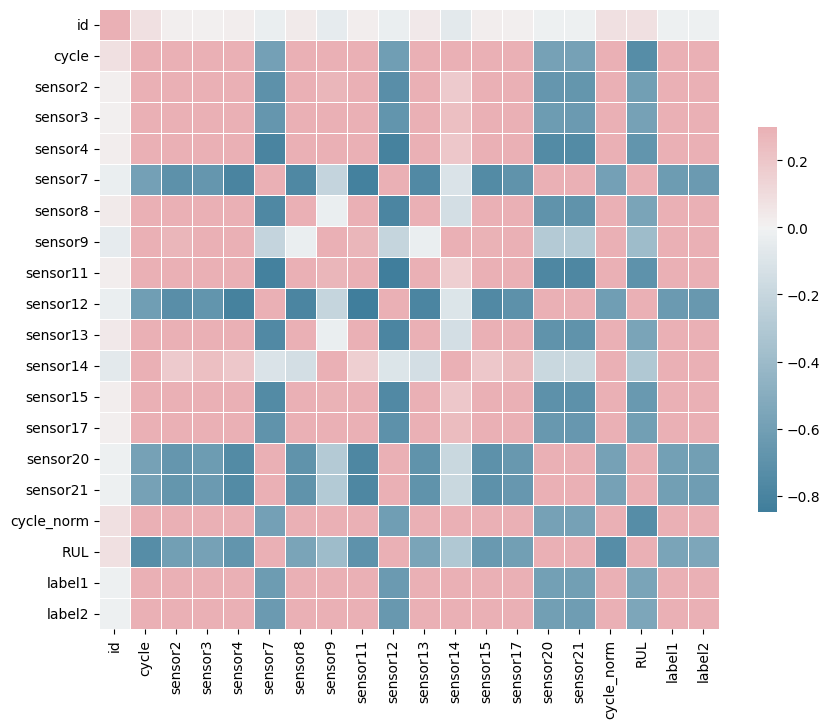

In [21]:
# Draw the correlation matrix of training dataframe
corr = train_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}).get_figure()
fig.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/correlation_matrix_of_training_df.png")

## LSTM

In [68]:
# TODO: Define window size and sequence length
sequence_length = 128  # Replace with the desired sequence length

# Function to reshape features into (samples, time steps, features) --> time steps is the same as sequence_length
# Note that this function only generate sequences for a single engine
def generate_sequences(id_df, sequence_length, feature_columns):
    """Generate sequences from a dataframe for a given id.
    Sequences that are under the sequence length will be considered.
    We can also pad the sequences in order to use shorter ones."""
    data_matrix = id_df[feature_columns].values
    num_elements = data_matrix.shape[0]

    for start, end in zip(range(0, num_elements - sequence_length), range(sequence_length, num_elements)):
        yield data_matrix[start:end, :]  # TODO: Replace with the correct code to yield sequences of feature values

# TODO: Select feature columns for sequence generation (e.g., sensor readings, settings)
sensor_columns = [c for c in train_df.columns if c.startswith("sensor")]  # TODO: Replace with the correct list of sensor column names
sequence_columns = sensor_columns  # TODO: Replace with the correct list of sequence column names (including settings and sensors)

# TODO: Generate sequences for all engine ids in the training data
sequence_generator = []  # TODO: Replace with the correct code to generate sequences
for engine_id in train_df["id"].unique():
  sub_train_df = train_df[train_df["id"] == engine_id]
  # Generate sequences for a single engine
  sequences = generate_sequences(sub_train_df, sequence_length, sequence_columns)
  for sequence in sequences:
    sequence_generator.append(sequence)

# TODO: Convert generated sequences to a numpy array for LSTM input
sequence_array = np.array(sequence_generator)  # TODO: Replace with the correct code to convert sequences to numpy array

print(sequence_array.shape)
# TODO: Function to generate labels -> (samples, time steps)
def generate_labels(id_df, sequence_length, label_column):
    """Generate labels for a given id."""
    data_matrix = id_df[label_column].values
    num_elements = data_matrix.shape[0]
    labels = [data_matrix[end] for end in range(sequence_length, num_elements)]
    labels = np.array(labels)
    return labels   # TODO: Replace with the correct code to generate labels

# TODO: Generate labels for all engine ids in the training data
label_generator = []  # TODO: Replace with the correct code to generate labels for all engine ids
for engine_id in train_df["id"].unique():
  sub_train_df = train_df[train_df["id"] == engine_id]
  # Generate sequences for a single engine
  labels = generate_labels(sub_train_df, sequence_length, ["label1"])
  for label in labels:
    label_generator.append(label)
label_array = np.array(label_generator)  # TODO: Replace with the correct code to convert labels to a numpy array
print(label_array.shape)

(7831, 128, 14)
(7831, 1)


## LSTM

In [69]:
# Define the number of features and output units
nb_features = sequence_array.shape[2]
nb_out = label_array.shape[1]

# Create a Sequential model
model_lstm = Sequential()

# TODO: Add LSTM layers and Dropout layers to the model
# Note: Limit the total number of model parameters to 10,000
# Your code here:

model_lstm.add(LSTM(8, return_sequences=False, input_shape=(sequence_length,len(sequence_columns))))
# model_lstm.add(Dropout(0.5))
# model_lstm.add(LSTM(8, return_sequences=False))
# model_lstm.add(Dropout(0.5))

# Add a Dense output layer with sigmoid activation
model_lstm.add(Dense(units=nb_out, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO: Print the model summary
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 8)                   │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 745 (2.91 KB)

 Trainable params: 745 (2.91 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# TODO: Fit the network to the training data
lstm_save_path = "/content/drive/MyDrive/95820-Application to NLP/hw1/LSTM_Checkpoints/LSTM_best.keras"
history = model_lstm.fit(
    sequence_array,
    label_array,
    epochs=100,  # TODO: Replace with the desired number of training epochs
    batch_size=128,  # TODO: Replace with the desired batch size
    validation_split=0.3,  # TODO: Replace with the desired validation split proportion
    verbose="auto",  # TODO: Replace with the desired verbosity level
    callbacks = [
        # TODO: Early stopping callback to stop training when validation loss stops improving
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0.00001,  # TODO: Replace with the minimum change in validation loss to qualify as improvement
            patience=15,  # TODO: Replace with the number of epochs to wait before stopping training
            verbose=1,  # TODO: Replace with the desired verbosity level
            mode='min'
        ),
        # TODO: Model checkpoint callback to save the best model based on validation loss
        keras.callbacks.ModelCheckpoint(
            lstm_save_path,  # TODO: Replace with the file path to save the best model
            monitor='val_loss',
            save_best_only=True,
            mode='min',
            verbose=1  # TODO: Replace with the desired verbosity level
        )
    ]
)

Epoch 1/100
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4241 - loss: 0.7127
Epoch 1: val_loss improved from inf to 0.62468, saving model to /content/drive/MyDrive/95820-Application to NLP/hw1/LSTM_Checkpoints/LSTM_best.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4335 - loss: 0.7100 - val_accuracy: 0.6749 - val_loss: 0.6247
Epoch 2/100
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6546 - loss: 0.6132
Epoch 2: val_loss improved from 0.62468 to 0.47791, saving model to /content/drive/MyDrive/95820-Application to NLP/hw1/LSTM_Checkpoints/LSTM_best.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6616 - loss: 0.6099 - val_accuracy: 0.8485 - val_loss: 0.4779
Epoch 3/100
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8384 - loss: 0.4724
Epoch 3: val_loss improved from 0.47791 to 0.36435, saving model to /content/drive/MyDrive/95820-Application to NLP/hw1/LSTM_Checkpoints/LSTM_best.keras
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8409

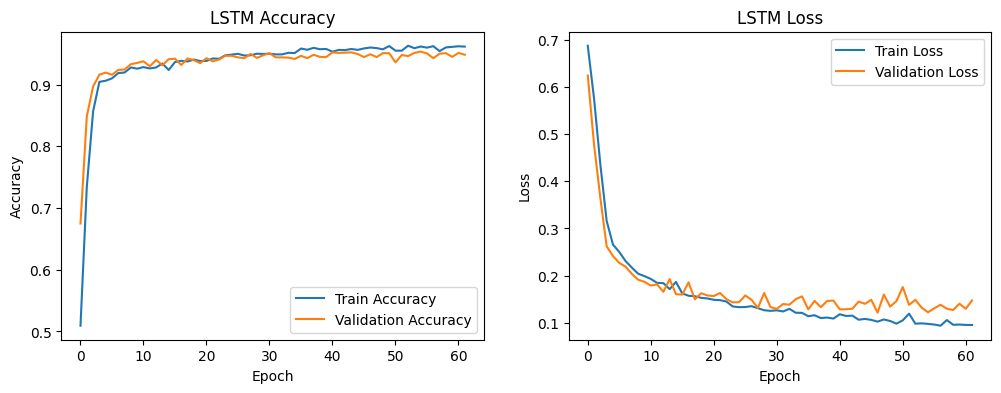

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9627 - loss: 0.0941
Training Accuracy: 0.9579874873161316
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[4685  207]
 [ 122 2817]]


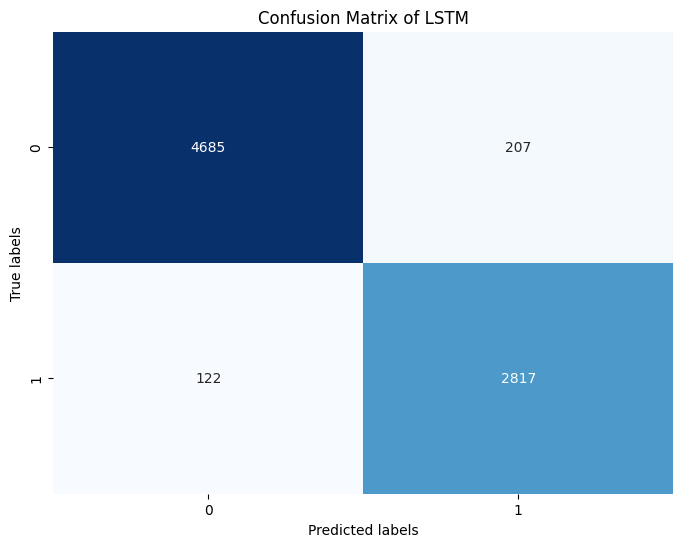

precision =  0.9315476190476191 
 recall =  0.9584892820687309


In [71]:
# TODO: summarize history for Accuracy
# TODO: Plot the training & validation accuracy over epochs and display the plot
# TODO: Save the plot to a file
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()



# TODO: summarize history for Loss
# TODO: Plot the training & validation loss over epochs and display the plot
# TODO: Save the plot to a file
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/LSTM_Validation_vs_Training.png")
plt.show()


# TODO: Use the evaluate method to calculate the accuracy of the model on the training data
scores = model_lstm.evaluate(sequence_array, label_array)  # TODO: Replace with the correct code to evaluate the model on the training data

# Print the accuracy of the model on the training data
print(f"Training Accuracy: {scores[1]}")

# make predictions and compute confusion matrix
# TODO: Use the predict method to make predictions on the training data
# TODO: Convert the predicted probabilities to class labels (e.g., using a threshold of 0.5)
y_pred = model_lstm.predict(sequence_array) # TODO: Use predict and convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)
y_true = label_array

# TODO: Create a Pandas DataFrame from the predicted labels and save it to a CSV file
test_set = pd.DataFrame(y_pred, columns=["predicted_labels"])  # TODO: Replace with the correct code to create a DataFrame from the predicted labels
test_set.to_csv("/content/drive/MyDrive/95820-Application to NLP/hw1/lstm_predicted_labels_train.csv", index=False)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
# TODO: Compute the confusion matrix using confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_true, y_pred)  # TODO: Replace with the correct code to compute the confusion matrix
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)  # fmt='g' to display integer values
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of LSTM')
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/LSTM_Confusion_Matrix.png")
plt.show()
# TODO: Calculate the precision using precision_score and recall using recall_score from sklearn.metrics
precision = precision_score(y_true, y_pred)  # TODO: Replace with the correct code to calculate precision
recall = recall_score(y_true, y_pred)  # TODO: Replace with the correct code to calculate recall
print( 'precision = ', precision, '\n', 'recall = ', recall)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9077 - loss: 0.2918 
Accuracy: 0.8928571343421936
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[28  6]
 [ 0 22]]


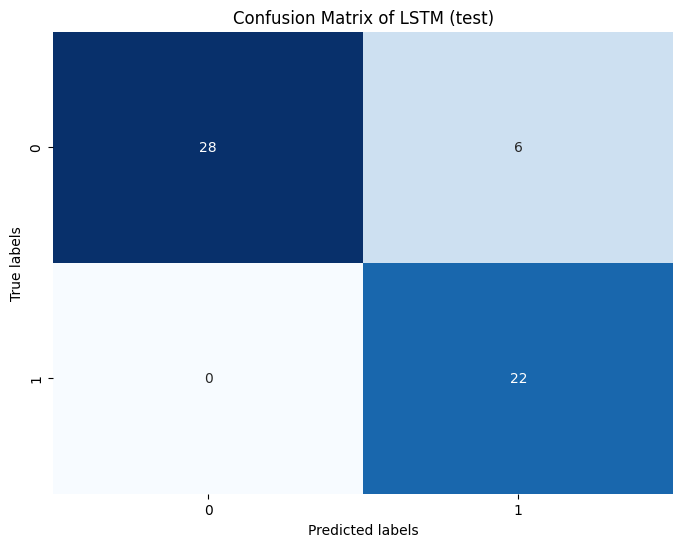

Precision:  0.7857142857142857 
 Recall:  1.0 
 F1-score: 0.88


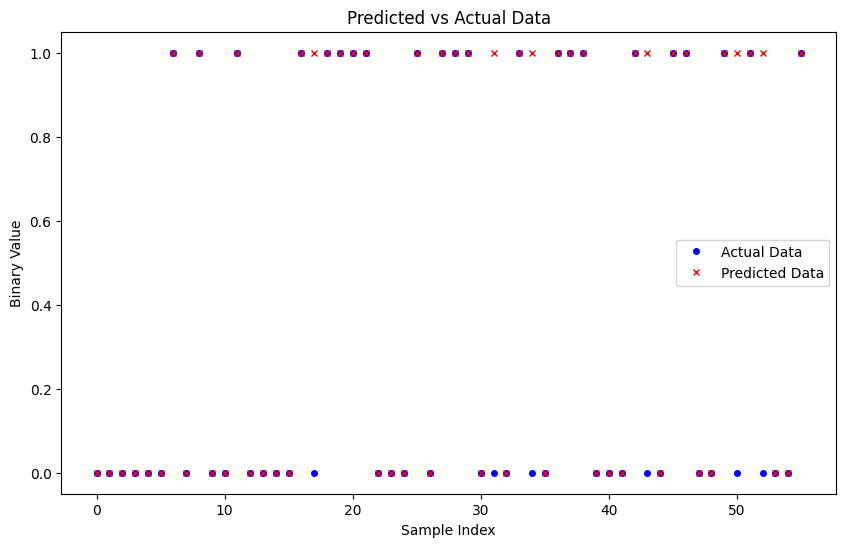

In [72]:
# TODO: Pick the last sequence for each id in the test data
seq_array_test_last = []  # Replace with code to select last sequence for each id
for engine_id in test_df["id"].unique():
  sub_test_df = test_df[test_df["id"] == engine_id]

  last_sequence = sub_test_df[sequence_columns].values[-sequence_length:]
  if last_sequence.shape[0] >= sequence_length:
    seq_array_test_last.append(last_sequence)

# TODO: Convert to numpy array and ensure float32 data type
seq_array_test_last = np.array(seq_array_test_last).astype(np.float32)

# TODO: Pick the labels for the selected sequences
y_mask = test_df.groupby('id').size() >= sequence_length  # TODO: Replace with code to select labels for sequences with length >= sequence_length
label_array_test_last = []  # TODO: Replace with code to select labels for the selected sequences
for engine_id in test_df['id'].unique():
    if y_mask[engine_id]:  # Only consider engines with length >= sequence_length
        # Filter the data for the current engine_id
        sub_test_df = test_df[test_df['id'] == engine_id]

        # Select the label for the last sequence
        last_label = sub_test_df['label1'].values[-1]

        # Append the last label to the list
        label_array_test_last.append(last_label)

# Reshape and ensure float32 data type
label_array_test_last = np.array(label_array_test_last)
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)


# TODO: Load the saved model if it exists
model_path = lstm_save_path
if os.path.isfile(model_path):
    estimator = load_model(model_path)  # TODO: Replace with code to load the saved model

# TODO: Evaluate the model on the test data
scores_test_lstm = estimator.evaluate(seq_array_test_last, label_array_test_last)  # TODO: Replace with code to evaluate the model on the test data
print('Accuracy: {}'.format(scores_test_lstm[1]))

# TODO: Make predictions and compute confusion matrix
y_pred_test = estimator.predict(seq_array_test_last) # TODO: Replace with code to make predictions and convert to class labels
y_pred_test = (y_pred_test > 0.5).astype(int)
y_true_test = label_array_test_last

# TODO: Create pandas dataframe of y_pred_test and save predictions to CSV file
test_set = pd.DataFrame(y_pred, columns=["predicted_labels"])
test_set.to_csv("/content/drive/MyDrive/95820-Application to NLP/hw1/predicted_labels_test_lstm.csv", index=False)

# TODO: Compute confusion matrix
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)  # TODO: Replace with the correct code to compute the confusion matrix
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)  # fmt='g' to display integer values
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of LSTM (test)')
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/LSTM_Confusion_Matrix_testing.png")
plt.show()

# TODO: Compute precision, recall, and F1-score
precision_test_lstm = precision_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute precision
recall_test_lstm = recall_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute recall
f1_test_lstm = 2 * precision_test_lstm * recall_test_lstm / (precision_test_lstm + recall_test_lstm)  # TODO: Replace with code to compute F1-score
print('Precision: ', precision_test_lstm, '\n', 'Recall: ', recall_test_lstm, '\n', 'F1-score:', f1_test_lstm)

# TODO: Plot predicted and actual data for visual verification
plt.figure(figsize=(10, 6))

# Plot actual values (ground truth)
plt.plot(label_array_test_last, 'bo', label='Actual Data', markersize=4, linestyle='')

# Plot predicted values
plt.plot(y_pred_test, 'rx', label='Predicted Data', markersize=4, linestyle='')

plt.title('Predicted vs Actual Data')
plt.xlabel('Sample Index')
plt.ylabel('Binary Value')
plt.legend()
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/LSTM_Predicted_vs_Actual_test.png")
plt.show()

## GRU

In [58]:
# Define the number of features and output units
nb_features = sequence_array.shape[2]
nb_out = label_array.shape[1]

# Create a Sequential model
model_gru = Sequential()

# TODO: Add GRU layers and Dropout layers to the model
# Note: Limit the total number of model parameters to 10,000
# Your code here:
model_gru.add(GRU(8, return_sequences=False, input_shape=(sequence_length,len(sequence_columns))))
# model_gru.add(Dropout(0.5))
# model_gru.add(GRU(16, return_sequences=False))
# model_gru.add(Dropout(0.5))


# Add a Dense output layer with sigmoid activation
model_gru.add(Dense(units=nb_out, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# TODO: Print the model summary
model_gru.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 8)                   │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 585 (2.29 KB)

 Trainable params: 585 (2.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [59]:
# TODO: Fit the network to the training data
gru_save_path = "/content/drive/MyDrive/95820-Application to NLP/hw1/GRU_Checkpoints/GRU_best.keras"
history = model_gru.fit(
    sequence_array,
    label_array,
    epochs=100,  # TODO: Replace with the desired number of training epochs
    batch_size=64,  # TODO: Replace with the desired batch size
    validation_split=0.2,  # TODO: Replace with the desired validation split proportion
    verbose="auto",  # TODO: Replace with the desired verbosity level
    callbacks = [
        # TODO: Early stopping callback to stop training when validation loss stops improving
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0.00001,  # TODO: Replace with the minimum change in validation loss to qualify as improvement
            patience=10,  # TODO: Replace with the number of epochs to wait before stopping training
            verbose=1,  # TODO: Replace with the desired verbosity level
            mode='min'
        ),
        # TODO: Model checkpoint callback to save the best model based on validation loss
        keras.callbacks.ModelCheckpoint(
            gru_save_path,  # TODO: Replace with the file path to save the best model
            monitor='val_loss',
            save_best_only=True,
            mode='min',
            verbose=1  # TODO: Replace with the desired verbosity level
        )
    ]
)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4488 - loss: 0.7448
Epoch 1: val_loss improved from inf to 0.52838, saving model to /content/drive/MyDrive/95820-Application to NLP/hw1/GRU_Checkpoints/GRU_best.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4502 - loss: 0.7441 - val_accuracy: 0.8283 - val_loss: 0.5284
Epoch 2/100
94/98 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8432 - loss: 0.4738
Epoch 2: val_loss improved from 0.52838 to 0.31465, saving model to /content/drive/MyDrive/95820-Application to NLP/hw1/GRU_Checkpoints/GRU_best.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8446 - loss: 0.4703 - val_accuracy: 0.8781 - val_loss: 0.3147
Epoch 3/100
95/98 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8908 - loss: 0.2914
Epoch 3: val_loss improved from 0.31465 to 0.28689, saving model to /content/drive/MyDrive/95820-Application to NLP/hw1/GRU_Checkpoints/GRU_best.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8908 - los

## Model Evaluation on Test set

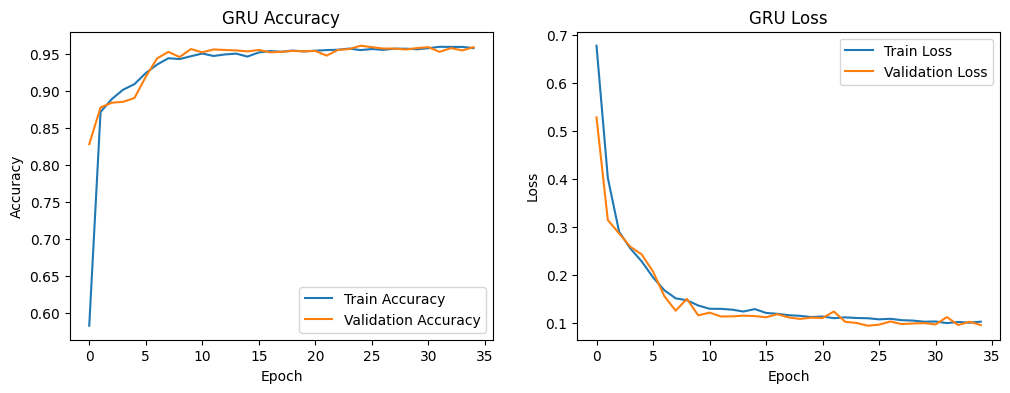

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9604 - loss: 0.0958
Training Accuracy: 0.9601583480834961
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[4768  124]
 [ 188 2751]]


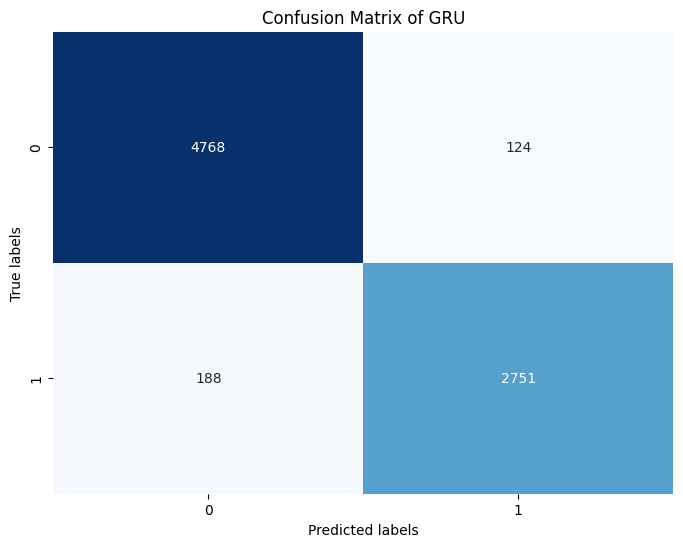

precision =  0.9568695652173913 
 recall =  0.9360326641714869


In [60]:
# TODO: summarize history for Accuracy
# TODO: Plot the training & validation accuracy over epochs and display the plot
# TODO: Save the plot to a file
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()



# TODO: summarize history for Loss
# TODO: Plot the training & validation loss over epochs and display the plot
# TODO: Save the plot to a file
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/GRU_Validation_vs_Training.png")
plt.show()


# TODO: Use the evaluate method to calculate the accuracy of the model on the training data
scores = model_gru.evaluate(sequence_array, label_array)  # TODO: Replace with the correct code to evaluate the model on the training data

# Print the accuracy of the model on the training data
print(f"Training Accuracy: {scores[1]}")

# make predictions and compute confusion matrix
# TODO: Use the predict method to make predictions on the training data
# TODO: Convert the predicted probabilities to class labels (e.g., using a threshold of 0.5)
y_pred = model_gru.predict(sequence_array) # TODO: Use predict and convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)
y_true = label_array

# TODO: Create a Pandas DataFrame from the predicted labels and save it to a CSV file
test_set = pd.DataFrame(y_pred, columns=["predicted_labels"])  # TODO: Replace with the correct code to create a DataFrame from the predicted labels
test_set.to_csv("/content/drive/MyDrive/95820-Application to NLP/hw1/gru_predicted_labels_train.csv", index=False)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
# TODO: Compute the confusion matrix using confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_true, y_pred)  # TODO: Replace with the correct code to compute the confusion matrix
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)  # fmt='g' to display integer values
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of GRU')
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/GRU_Confusion_Matrix.png")
plt.show()
# TODO: Calculate the precision using precision_score and recall using recall_score from sklearn.metrics
precision = precision_score(y_true, y_pred)  # TODO: Replace with the correct code to calculate precision
recall = recall_score(y_true, y_pred)  # TODO: Replace with the correct code to calculate recall
print( 'precision = ', precision, '\n', 'recall = ', recall)

## Model Evaluation on Validation set

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9077 - loss: 0.4505 
Accuracy: 0.8928571343421936
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[28  6]
 [ 0 22]]


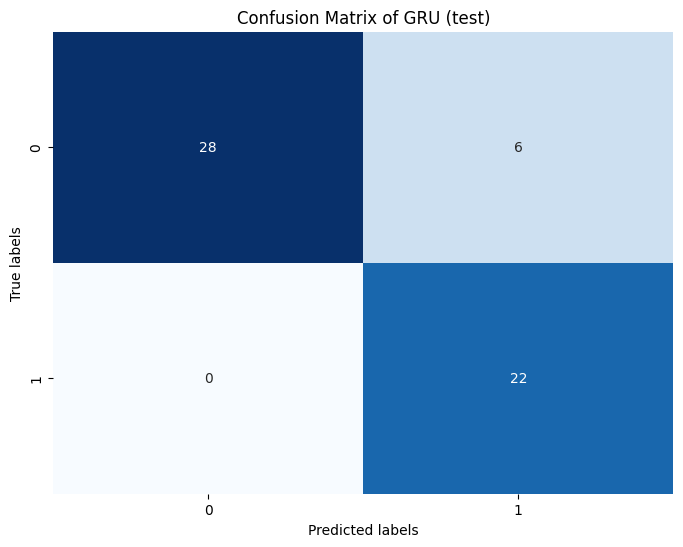

Precision:  0.7857142857142857 
 Recall:  1.0 
 F1-score: 0.88


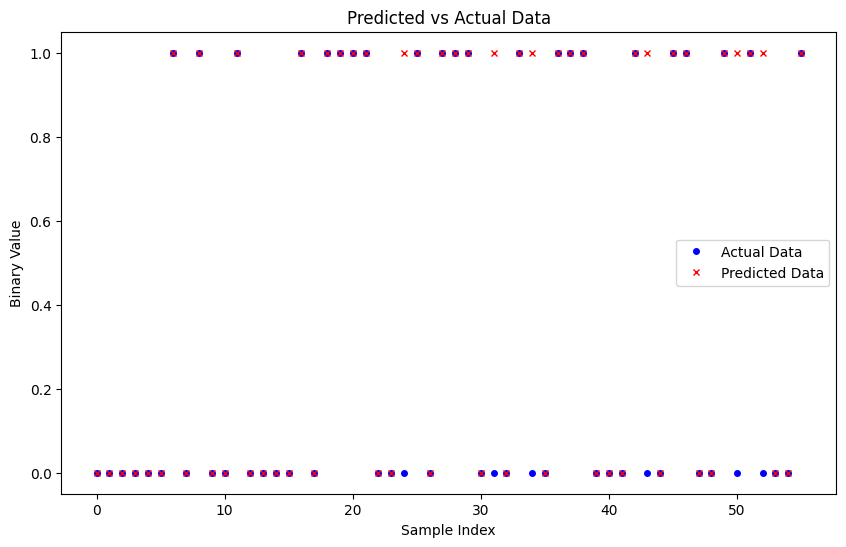

In [61]:
# TODO: Pick the last sequence for each id in the test data
seq_array_test_last = []  # Replace with code to select last sequence for each id
for engine_id in test_df["id"].unique():
  sub_test_df = test_df[test_df["id"] == engine_id]

  last_sequence = sub_test_df[sequence_columns].values[-sequence_length:]
  if last_sequence.shape[0] >= sequence_length:
    seq_array_test_last.append(last_sequence)

# TODO: Convert to numpy array and ensure float32 data type
seq_array_test_last = np.array(seq_array_test_last).astype(np.float32)

# TODO: Pick the labels for the selected sequences
y_mask = test_df.groupby('id').size() >= sequence_length  # TODO: Replace with code to select labels for sequences with length >= sequence_length
label_array_test_last = []  # TODO: Replace with code to select labels for the selected sequences
for engine_id in test_df['id'].unique():
    if y_mask[engine_id]:  # Only consider engines with length >= sequence_length
        # Filter the data for the current engine_id
        sub_test_df = test_df[test_df['id'] == engine_id]

        # Select the label for the last sequence
        last_label = sub_test_df['label1'].values[-1]

        # Append the last label to the list
        label_array_test_last.append(last_label)

# Reshape and ensure float32 data type
label_array_test_last = np.array(label_array_test_last)
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)



# TODO: Load the saved model if it exists
model_path = gru_save_path
if os.path.isfile(model_path):
    estimator = load_model(model_path)  # TODO: Replace with code to load the saved model

# TODO: Evaluate the model on the test data
scores_test_gru = estimator.evaluate(seq_array_test_last, label_array_test_last)  # TODO: Replace with code to evaluate the model on the test data
print('Accuracy: {}'.format(scores_test_gru[1]))

# TODO: Make predictions and compute confusion matrix
y_pred_test = estimator.predict(seq_array_test_last) # TODO: Replace with code to make predictions and convert to class labels
y_pred_test = (y_pred_test > 0.5).astype(int)
y_true_test = label_array_test_last

# TODO: Create pandas dataframe of y_pred_test and save predictions to CSV file
test_set = pd.DataFrame(y_pred, columns=["predicted_labels"])
test_set.to_csv("/content/drive/MyDrive/95820-Application to NLP/hw1/predicted_labels_test_gru.csv", index=False)

# TODO: Compute confusion matrix
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)  # TODO: Replace with the correct code to compute the confusion matrix
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)  # fmt='g' to display integer values
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of GRU (test)')
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/GRU_Confusion_Matrix_testing.png")
plt.show()

# TODO: Compute precision, recall, and F1-score
precision_test_gru = precision_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute precision
recall_test_gru = recall_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute recall
f1_test_gru = 2 * precision_test_gru * recall_test_gru / (precision_test_gru + recall_test_gru)  # TODO: Replace with code to compute F1-score
print('Precision: ', precision_test_gru, '\n', 'Recall: ', recall_test_gru, '\n', 'F1-score:', f1_test_gru)

# TODO: Plot predicted and actual data for visual verification
plt.figure(figsize=(10, 6))

# Plot actual values (ground truth)
plt.plot(label_array_test_last, 'bo', label='Actual Data', markersize=4, linestyle='')

# Plot predicted values
plt.plot(y_pred_test, 'rx', label='Predicted Data', markersize=4, linestyle='')

plt.title('Predicted vs Actual Data')
plt.xlabel('Sample Index')
plt.ylabel('Binary Value')
plt.legend()
plt.savefig("/content/drive/MyDrive/95820-Application to NLP/hw1/figures/GRU_Predicted_vs_Actual_test.png")
plt.show()

In [62]:
results_df = pd.DataFrame([[scores_test_lstm[1],precision_test_lstm,recall_test_lstm,f1_test_lstm],
                           [scores_test_gru[1],precision_test_gru,recall_test_gru,f1_test_gru],
                           [0.94, 0.952381, 0.8, 0.869565]],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                         index = ['LSTM',
                                  "GRU",
                                 'Template Best Model'])
results_df

,Accuracy,Precision,Recall,F1-score
LSTM,0.875000,0.758621,1.0,0.862745
GRU,0.892857,0.785714,1.0,0.880000
Template Best Model,0.940000,0.952381,0.8,0.869565
